<a href="https://colab.research.google.com/github/elangbijak4/Testing_-_Exploration_4_Quantum_Machine/blob/main/Algoritma_implementasi_arXiv_2210_15380v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode di bawah ini mencoba mengimplementasikan ide algoritma di dalam paper Anand Natarajan dan Chinmay Nirkhe arXiv:2210.15380v5 [quant-ph] 11 Jun 2024.

In [ ]:
!pip install  cirq

In [ ]:
!pip install cirq --upgrade  # Upgrade Cirq to the latest version

In [4]:
import cirq
import matplotlib.pyplot as plt

In [11]:
from cirq.contrib.svg import SVGCircuit  # Import the necessary module for drawing

In [16]:
from IPython.display import SVG, display  # Import display from IPython

In [47]:
import numpy as np

In [49]:
# Fungsi untuk membuat graf regular undirected
def create_regular_graph(num_nodes, degree):
    if degree >= num_nodes:
        raise ValueError("Degree must be less than number of nodes.")
    graph = {}
    for node in range(num_nodes):
        graph[node] = set()
    for node in range(num_nodes):
        while len(graph[node]) < degree:
            neighbor = np.random.randint(0, num_nodes)
            if neighbor != node and len(graph[neighbor]) < degree:
                graph[node].add(neighbor)
                graph[neighbor].add(node)
    return graph

# Membuat oracle sebagai fungsi kuantum
def oracle(graph):
    num_qubits = len(graph)
    qubits = cirq.LineQubit.range(num_qubits)

    # Membuat sirkuit kuantum
    circuit = cirq.Circuit()

    # Tambahkan gerbang Hadamard ke semua qubit
    circuit.append(cirq.H.on_each(qubits))

    # Tambahkan operasi oracle berbasis pada graf
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            circuit.append(cirq.CNOT(qubits[node], qubits[neighbor]))

    # Tambahkan gerbang Hadamard lagi untuk mengubah basis kembali
    circuit.append(cirq.H.on_each(qubits))

    # Tambahkan pengukuran ke semua qubit # Add measurements to all qubits
    circuit.append(cirq.measure(*qubits, key='result'))

    return circuit, qubits

# Verifikasi hasil
def run_oracle(circuit, qubits):
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    return result

# Membuat graf regular undirected dengan 4 node dan derajat 2
graph = create_regular_graph(num_nodes=4, degree=2)
print("Graf:", graph)

# Membuat dan menjalankan oracle
circuit, qubits = oracle(graph)
print("Sirkuit Oracle:\n", circuit)

# Menjalankan simulasi
result = run_oracle(circuit, qubits)
print("Hasil Simulasi:\n", result)

Graf: {0: {2, 3}, 1: {2, 3}, 2: {0, 1}, 3: {0, 1}}
Sirkuit Oracle:
               ┌──┐   ┌──┐   ┌──┐   ┌──┐
0: ───H───@────@───────X──────X─────H─────────M('result')───
          │    │       │      │               │
1: ───H───┼────┼@─────@┼─────X┼─────X─────H───M─────────────
          │    ││     ││     ││     │         │
2: ───H───X────┼X─────┼@─────@┼─────┼H────────M─────────────
               │      │       │     │         │
3: ───H────────X──────X───────@─────@─────H───M─────────────
              └──┘   └──┘   └──┘   └──┘
Hasil Simulasi:
 result=00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

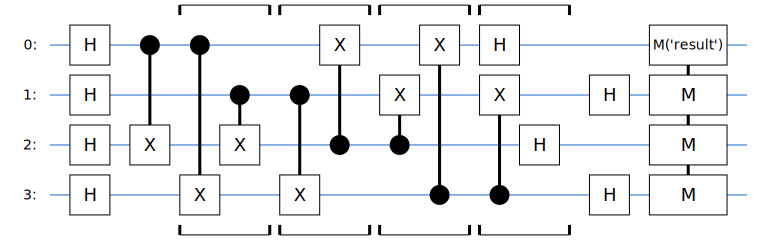

In [50]:
# Use SVGCircuit to draw the circuit
svg_circuit = cirq.contrib.svg.SVGCircuit(circuit)

# Get the SVG content as a string (using _repr_svg_)
svg_string = svg_circuit._repr_svg_()

# Display the SVG in the notebook
display(SVG(svg_string))

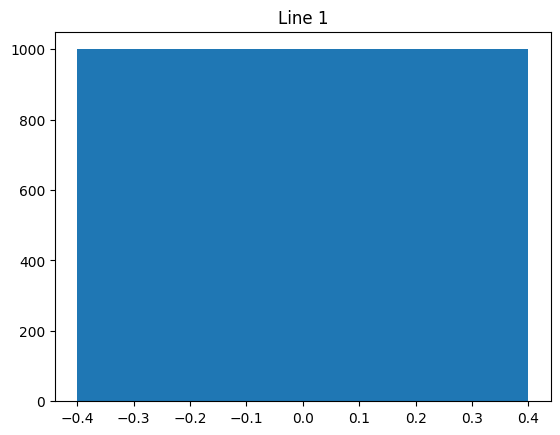

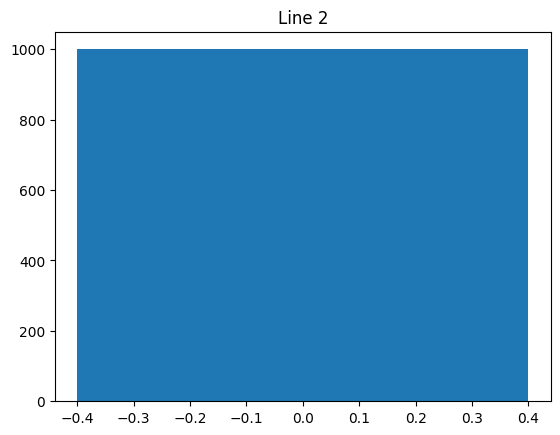

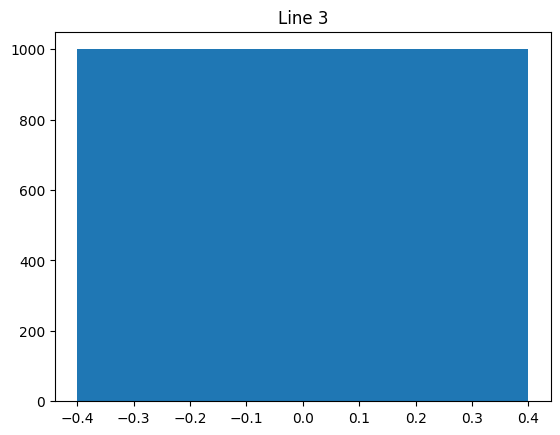

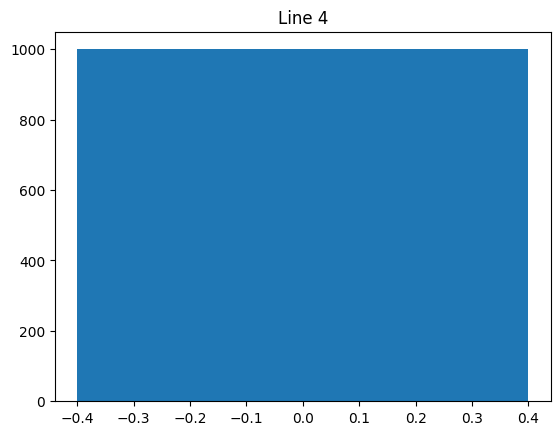

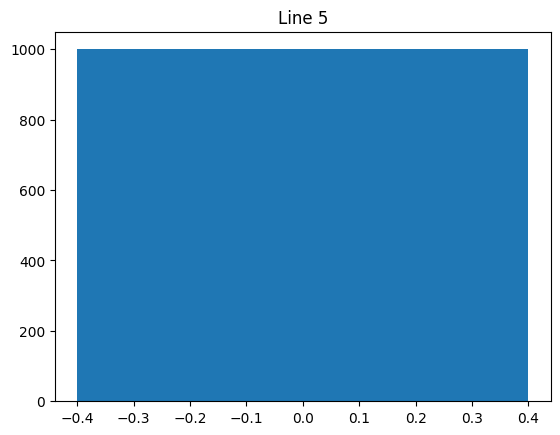

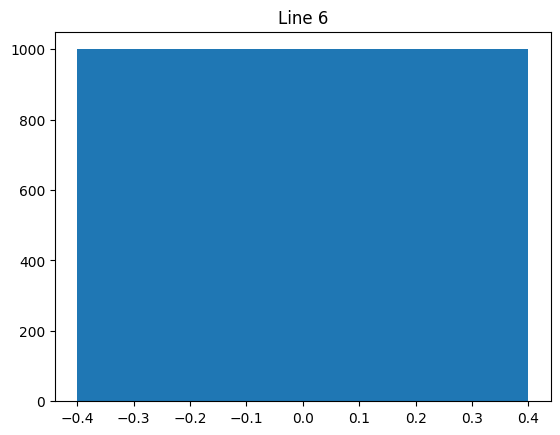

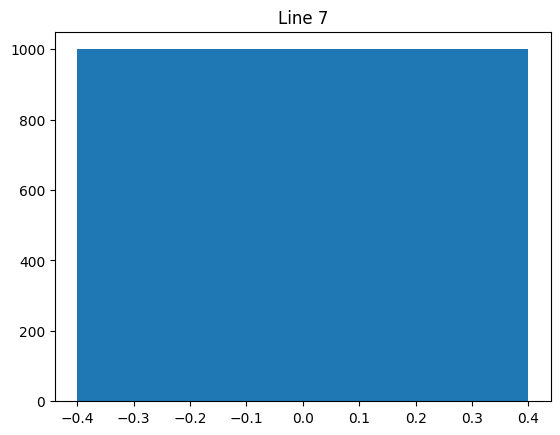

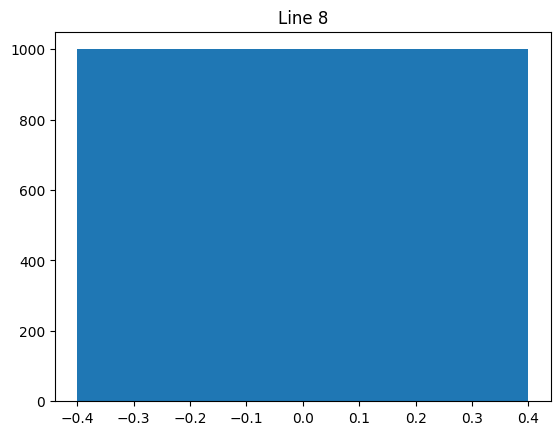

In [52]:
# Define a function to create a histogram of probabilities for each line in the circuit
def plot_line_probabilities(circuit, qubits):
    # Get the number of qubits in the circuit
    num_qubits = len(qubits)

    # Create a list to store the probabilities for each line
    line_probabilities = []

    # Iterate over each line in the circuit
    for line in circuit:
        # Get the qubits involved in the line
        qubits_in_line = line.qubits

        # Simulate the circuit and get the measurement results
        result = cirq.Simulator().run(circuit, repetitions=1000)

        # Get the probability of each outcome for the line
        # Use the measured results directly, no need for qubit_map
        probabilities = result.histogram(key="result")

        # Add the probabilities to the list
        line_probabilities.append(probabilities)

    # Plot the histogram for each line
    for i, probabilities in enumerate(line_probabilities):
        plt.bar(probabilities.keys(), probabilities.values())
        plt.title(f"Line {i+1}")
        plt.show()

# Create a regular undirected graph with 4 nodes and degree 2
graph = create_regular_graph(num_nodes=4, degree=2)

# Create and run the oracle
circuit, qubits = oracle(graph)

# Plot the histogram of probabilities for each line
plot_line_probabilities(circuit, qubits)